# Functions

### Exercises

  1. Define a function to compute the mean and the variance of a list of numbers. Check with numpy
  
  
  2. Given a list of $[(x, y)]$ numbers, make a function to compute its minimum distance to the origin. 
  
  
  4. Define a poisson probability function, $p(\mu | n)$. 
  
      * Define a functor, that passing as argument the mean value of a poisson, $\mu$,  will return to you a function, $f(n)$, that $f(n) = p(n | \mu)$. 


  5. Write a set of functions to fit a sample $\{(x_i, y_i)\}$ points, with uncertainties $\sigma_i$ to a straight line via least squares method.

In [ ]:
# 1.

import numpy as np

def mean(ls):

    return sum(ls)/len(ls)

def var(ls):

    ls_mean = mean(ls)
    ls_len = len(ls)
    ls_var = sum(list(map(lambda x: (x - ls_mean)**2/ls_len, ls)))

    return ls_var

def std(ls):

    return np.sqrt(var(ls))


example_list = [2,4,6,1,3]


print(f'The mean is: {mean(example_list):.4f}')
print(f'The standard deviation is: {std(example_list):.4f}')

print()

print('Numpy check: \n')

print(f'The mean is: {np.mean(example_list):.4f}')
print(f'The standard deviation is: {np.std(example_list):.4f}')



The mean is: 3.2000
The standard deviation is: 1.7205

Numpy check: 

The mean is: 3.2000
The standard deviation is: 1.7205


In [ ]:
# 2

import math

def minimum_origin_distance(ls):
    """
    Compute the minimum distance to the origin of a list (ls)
    of the form [(x1, y1), (x2, y2), ...]
    """

    # Compute a minimum distance for reference (in this case, of the first (x,y) pair)
    minimum_distance = math.sqrt(ls[0][0]**2 + ls[0][1]**2)

    for elem in ls:

        x, y = elem

        origin_distance = math.sqrt(x**2 + y**2)

        if origin_distance < minimum_distance:

            minimum_distance = origin_distance

    return minimum_distance

# create an example sample

sample = [(1,3), (2,4), (6,7), (2,8)]

print(f'The minimum distance to the origin is: {minimum_origin_distance(sample):.4f}')

The minimum distance to the origin is: 3.1623


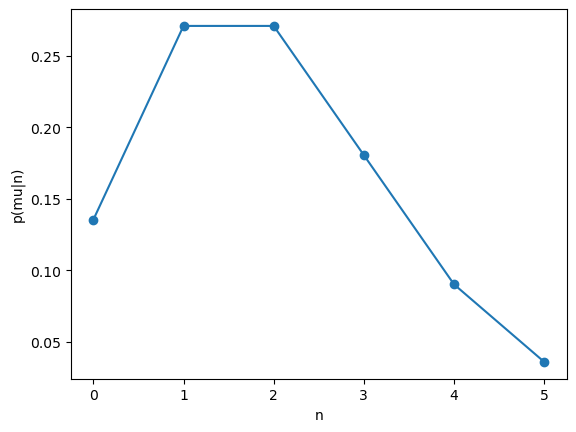

In [ ]:
# 3

import math
import matplotlib.pyplot as plt # for visualization

def define_poisson_distribution(mu):

    def poisson_probability_function(n):

        return mu**n * math.exp(-mu)/math.factorial(n)

    return poisson_probability_function

mu = 2

poisson = define_poisson_distribution(mu)

x = list(range(6))
y = list(map(poisson, x))

plt.plot(x,y ,'o-')
plt.xlabel('n')
plt.ylabel('p(mu|n)')
plt.show()

Given a dataset $(x_i, y_i, \sigma_i)$:
$$
w_i = \frac{1}{\sigma_i^2}
$$

$$
S = \sum_i w_i, \quad
S_x = \sum_i w_i x_i, \quad
S_y = \sum_i w_i y_i, \quad
S_{xx} = \sum_i w_i x_i^2, \quad
S_{xy} = \sum_i w_i x_i y_i \quad
\Delta = S\,S{xx} - S_x²
$$

$$
\boxed{
a = \frac{S_{xx}\,S_y - S_x\,S_{xy}}{\Delta}\quad
b = \frac{S\,S_{x} - S_x\,S_y}{\Delta}
}
$$

a = 1.0924, b = 1.9536

Check with numpy polyfit:

a = 1.0924, b = 1.9536


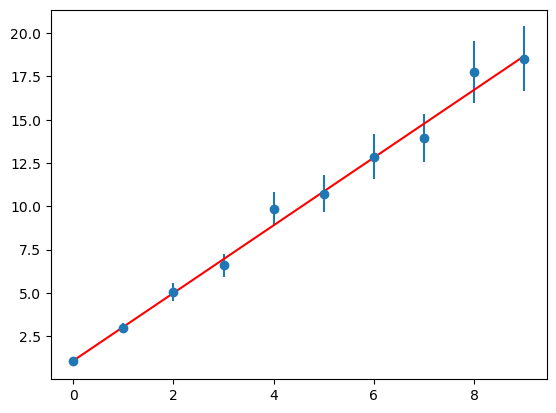

In [ ]:
# 4.

import numpy as np
import matplotlib.pyplot as plt

def compute_Sx(x, s):

    aux = list(map(lambda xi, si: xi/si**2, x, s))
    return sum(aux)

def compute_Sxx(x, s):

    aux = list(map(lambda xi, si: xi**2/si**2, x, s))
    return sum(aux)

def compute_Sy(y, s):
    
    aux = list(map(lambda yi, si: yi/si**2, y, s))
    return sum(aux)

def compute_Sxy(x, y, s):
    
    aux = list(map(lambda xi, yi, si: xi*yi/si**2, x, y, s))
    return sum(aux)

def compute_S(s):

    aux = list(map(lambda si: 1/si**2, s))
    return sum(aux)

def compute_a_b(x, y, s):

    S   = compute_S(s)
    Sx  = compute_Sx(x, s)
    Sy  = compute_Sy(y, s)
    Sxx = compute_Sxx(x, s)
    Sxy = compute_Sxy(x, y, s)

    delta = S * Sxx - Sx**2

    a = (Sxx * Sy - Sx * Sxy) / delta
    b = (S * Sxy - Sx * Sy) / delta

    return a, b

def least_squares_fit(x, y, s):
    "functor that computes the least squares fit line"

    a, b = compute_a_b(x, y, s)

    return lambda t: a + b * t


# Example (data generated with numpy)

x = np.arange(10)
y = 2*x + 1 + 0.1*np.random.normal(0, 5, size=x.shape)
s = 0.1*np.abs(y)

a,b = compute_a_b(x, y, s)

print(f'a = {a:.4f}, b = {b:.4f}')

print('\nCheck with numpy polyfit:\n')

p = np.polyfit(x, y, 1, w=1/s)

print(f'a = {p[1]:.4f}, b = {p[0]:.4f}')


line = least_squares_fit(x, y, s)

plt.errorbar(x, y, yerr=s, fmt='o', label='data')
plt.plot(x, line(x), 'r-', label='least squares fit')
plt.show()


# List expressions

### 1. Implement a function that takes two tuples with names and phone numbers, and return a unique tuple with (name, phone number), use the *zip* function. Return now a dictionary
  


In [ ]:
# 1.

names = ['Juan', 'Ana', 'Pedro', 'Maria']
numbers = [23, 45, 12, 67]

def mix_lists(A, B):
    return tuple(zip(A, B))

def dict_from_lists(A, B):
    return dict(zip(A, B))

names_numbers = mix_lists(names, numbers)
print(f'Tuple with names and numbers = {names_numbers}')

names_numbers_dict = dict_from_lists(names, numbers)
print(f'Dictionary with names and numbers = {names_numbers_dict}')

Tuple with names and numbers = (('Juan', 23), ('Ana', 45), ('Pedro', 12), ('Maria', 67))
Dictionary with names and numbers = {'Juan': 23, 'Ana': 45, 'Pedro': 12, 'Maria': 67}


  
### 2. Implement a function that takes a tuple with items and using *enumerate*, return the largest item in a list and its position inside the list.


In [ ]:
# 2.

def find_max_and_index(ls):

    maximum = ls[0]
    maximum_index = 0
    for pos, elem in enumerate(ls):
        
        if elem > maximum:

            maximum = elem
            maximum_index = pos
    
    return maximum_index, maximum

ls = [2,3,5,6,2,5]

index, value = find_max_and_index(ls)

print(f'The maximum of the list is in position {index} and its value is {value}')

The maximum of the list is in position 3 and its value is 6


# Classes

### 1. Finish the implementation of the class Complex

In [1]:
import math

class Complex:
    """ Complex number with module and phase as attributes
    """
        
    def __init__(self, mod, phase):
        """ To construct a complex number from the module and the phase
        """
        if (mod < 0): 
            raise TypeError('module must be zero or positive')
        self.mod   = mod
        self.phase = phase
        return
    

    def real(self):
        """ return the real part
        """
        real = self.mod * math.cos(self.phase) 
        return real
 
    def img(self):
        """ return the imaginary part
        """
        img = self.mod * math.sin(self.phase)
        return img
    
    def __abs__(self):
        """ return the module
        """
        return self.mod
    
    def to_Complex(y):
        """"Auxiliary function to convert a number into a complex number"""
        if  isinstance(y, int) or isinstance(y,float):
            if (y >= 0):
                return Complex(y, 0)
            else:
                return Complex(-y, math.pi)
        elif isinstance(y, Complex):
            return y
        else:
            raise TypeError('the second operand must be a number')

    def __add__(self, y):
        """ add to complex numbers <=> x+y
        """
        y = Complex.to_Complex(y)

        real = self.real() + y.real()
        img  = self.img()  + y.img()
        mod  = math.sqrt(real*real + img*img)
        phase = 0.
        if (mod > 0): 
            phase = math.acos(real / mod)
        return Complex(mod, phase)
    
    def __sub__(self, y):
        """ subtract two complex numbers: x-y
        """
        y = Complex.to_Complex(y)

        real = self.real() - y.real()
        img  = self.img()  - y.img()
        mod  = math.sqrt(real*real + img*img)
        phase = 0.
        if (mod > 0): 
            phase = math.acos(real / mod)
        return Complex(mod, phase)
    
    def __mul__(self, y):
        """ the product of two complex numbers: x*y
        """ 
        y = Complex.to_Complex(y)

        mod   = self.mod   * y.mod
        phase = self.phase + y.phase
        return Complex(mod, phase)
    
    def __truediv__(self, y):
        """ the division of two complex numbers: x/y
        """
        y = Complex.to_Complex(y)
        if (y.mod == 0):
            raise ZeroDivisionError('division by zero')
        
        mod   = self.mod   / y.mod
        phase = self.phase - y.phase
        return Complex(mod, phase)
    
    def __pow__(self, n):
        """ power of a complex number: x**n
        """
        if not isinstance(n, float) and not isinstance(n, int):
            raise TypeError('the exponent must be a real number')

        if (n < 0) and (self.mod == 0):
            raise ZeroDivisionError('0 cannot be raised to a negative power')
        
        mod   = self.mod**n
        phase = n * self.phase
        return Complex(mod, phase)

    def conjugate(self):
        """ complex conjugate
        """
        return Complex(self.mod, -1. * self.phase)
    
    def __str__(self):
        """ convert to a string
        """
        s = str(self.mod) + 'exp{i(' + str(self.phase) + ')}'
        return s
    def __repr__(self):
        return str(self)

### 2. Implement class *Vector* and *Matrix*

Implement class *Vector* and *Matrix* using python lists. First define the attributes and methods, then define a set of test-functions to verify the code, implement the methods and finally ensure that they pass your tests.

class Vector3D

* define abs, add, sub, mul, cros, div, str, eq, unit, neg
 

class Vector

* define abs, add, sub, mul, div, unit, eq, neg, str, repr, len, getitem, setitem

class Matrix

* define add, sub, mul, div, transpose, eq, neg, str, repr, len, getitem, setitem, neg



In [1]:
import math
import numpy as np

# Class vector3D

class Vector3D:

    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        return

    def __abs__(self):
        return math.sqrt(self.x**2 + self.y**2 + self.z**2)
    
    def __add__(self, v):

        if not isinstance(v, Vector3D):
            raise TypeError('the second operand must be a Vector3D')
        
        else:

            return Vector3D(self.x + v.x, self.y + v.y, self.z + v.z)

    def __sub__(self, v):

        if not isinstance(v, Vector3D):
            raise TypeError('the second operand must be a Vector3D')
        
        else:

            return Vector3D(self.x - v.x, self.y - v.y, self.z - v.z)
    
    def __mul__(self, v):

        if isinstance(v, int) or isinstance(v, float) or isinstance(v, complex):
            return Vector3D(self.x * v, self.y * v, self.z * v)
        
        elif isinstance(v, Vector3D):
            return self.x * v.x + self.y * v.y + self.z * v.z
        
        else:
            raise TypeError('the second operand must be a number or a Vector3D')
        
    def __rmul__(self, v):

        if isinstance(v, int) or isinstance(v, float) or isinstance(v, complex):
            return Vector3D(self.x * v, self.y * v, self.z * v)
        
        elif isinstance(v, Vector3D):
            return self.x * v.x + self.y * v.y + self.z * v.z
        
        else:
            raise TypeError('the second operand must be a number or a Vector3D')
        
    def cross(self, v):
    # cross product of two vectors

        if not isinstance(v, Vector3D):
            
            raise TypeError('the second operand must be a Vector3D')
        
        else:

            x = self.y * v.z - self.z * v.y
            y = self.z * v.x - self.x * v.z
            z = self.x * v.y - self.y * v.x

            return Vector3D(x, y, z)
    
    def __truediv__(self, a):

        if not (isinstance(a, int) or isinstance(a, float) or isinstance(a, complex)):
            raise TypeError('the second operand must be a number')
        
        if a == 0:
            raise ZeroDivisionError('division by zero')
        
        return Vector3D(self.x / a, self.y / a, self.z / a)
    
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ', ' + str(self.z) + ')'
    
    def __repr__(self):
        return str(self)
    
    def __eq__(self, value):
        
        if not isinstance(value, Vector3D):
            return False
        return np.isclose(self.x, value.x) and np.isclose(self.y, value.y) and np.isclose(self.z, value.z)
    
    def unit(self):
        """ return the unit vector
        """
        mod = abs(self)
        if mod == 0:
            raise ZeroDivisionError('division by zero')
        return self / mod
    
    def __neg__(self):

        return Vector3D(self.x, self.y, self.z) * -1
    
    def __getitem__(self, index):
        
        return [self.x, self.y, self.z][index]

    def __setitem__(self, index, value):

        ls = [self.x, self.y, self.z]
        ls[index] = value

        return Vector3D(*ls)



# Class vector

class Vector:

    def __init__(self, components):

        self.components = components
        return
    
    def __len__(self):
        return len(self.components)
    
    def __abs__(self):

        sum_sq = sum(c**2 for c in self.components)
        return math.sqrt(sum_sq)
    
    def add(self, v):

        if not isinstance(v, Vector):
            raise TypeError('the second operand must be a Vector')
        
        if len(v) != len(self):
            raise ValueError('the two vectors must have the same dimension')
        
        components = [self.components[i] + v.components[i] for i in range(len(self))]
        return Vector(components)
    
    def __sub__(self, v):

        if not isinstance(v, Vector):
            raise TypeError('the second operand must be a vector')
        
        if len(v) != len(self):
            raise ValueError('the two vectors must have the same dimension')
        
        components = [self.components[i] - v.components[i] for i in range(len(self))]
        return Vector(components)
    
    def __mul__(self, v):
        
        if isinstance(v, int) or isinstance(v, float) or isinstance(v, complex):
            components = [c * v for c in self.components]
            return Vector(components)
        
        elif isinstance(v, Vector):

            if len(v) != len(self):
                raise ValueError('the two vectors must have the same dimension')
            
            else:
                return sum(self.components[i] * v.components[i] for i in range(len(self)))
        
        else:
            raise TypeError('the second operand must be a number or a Vector')

    def __truediv__(self, a):

        if not (isinstance(a, int) or isinstance(a, float) or isinstance(a, complex)):
            raise TypeError('the second operand must be a number')
        
        if a == 0:
            raise ZeroDivisionError('division by zero')
        
        components = [c / a for c in self.components]
        return Vector(components)
    
    def unit(self):

        mod = abs(self)

        if mod == 0:

            raise ZeroDivisionError('division by zero')
        
        return self / mod

    def __eq__(self, value):
        
        if not isinstance(value, Vector):
            return False
        
        if len(value) != len(self):
            return False

        for i in range(len(self)):

            if not np.isclose(self.components[i], value.components[i]):

                return False
            
        return True

    
    def __neg__(self):

        components = [-c for c in self.components]
        return Vector(components)

    def __str__(self):
        
        vec = '('

        for i in range(len(self.components)-1):
            vec += str(self.components[i]) + ', '

        vec += str(self.components[-1]) + ')'

        return vec
    
    def __repr__(self):
        return str(self)
    
    def __getitem__(self, index):
        return self.components[index]
    
    def __setitem__(self, index, value):
        self.components[index] = value


# class Matrix

class Matrix:

    def __init__(self, rows):

        self.rows = rows
        return
    
    def __str__(self):
        
        string = ''
        for row in self.rows:
            for elem in row:

                string += str(elem) + ' '
            
            string += '\n'

        return string
    
    def __repr__(self):
        return str(self)

    def __len__(self):
        """return the number of rows of the matrix"""
        return len(self.rows)
    
    def shape(self):
        
        return len(self.rows), len((self.rows[0]))
    
    def T(self):
        """traspose of the matrix"""
        m,n = self.shape()

        rows_T = [[self.rows[j][i] for j in range(m)] for i in range(n)]

        return Matrix(rows_T)
    

    def __add__(self, M):

        if not isinstance(M, Matrix):
            raise TypeError('the second operand must be a Matrix')
        
        if self.shape() != M.shape():
            raise ValueError('the two matrices must have the same shape')
        
        m, n  = self.shape()

        rows = [[self.rows[i][j] + M.rows[i][j] for j in range(n)] for i in range(m)]
        
        return Matrix(rows)
    
    def __sub__(self, M):
        
        if not isinstance(M, Matrix):
            raise TypeError('the second operand must be a Matrix')
        
        if self.shape() != M.shape():
            raise ValueError('the two matrices must have the same shape')
        
        m, n  = self.shape()

        rows = [[self.rows[i][j] - M.rows[i][j] for j in range(n)] for i in range(m)]
        
        return Matrix(rows)
    
    ''' more complex __getitem__

    def __getitem__(self, index):
        """Return an element M[i,j] or a submatrix M[i1:i2, j1:j2]"""
        if not isinstance(index, tuple):
            """if we don't have a tuple, return all columns"""
            index = (index, slice(0, len(self.rows[0]), 1))
            

        i1, i2 = index

        def range_slice(i, size):
        
            if isinstance(i, slice):
                start = i.start if i.start is not None else 0
                stop  = i.stop if i.stop  is not None else size
                step  = i.step  if i.step  is not None else 1
                return [x for x in range(start, stop, step) if x in range(size)]
            else:
                return [i]

        range_i1 = range_slice(i1, len(self.rows))
        range_i2 = range_slice(i2, len(self.rows[0]))
        
        if len(range_i1) == 1 and len(range_i2) == 1:
            return self.rows[range_i1[0]][range_i2[0]]
    
        return Matrix([[self.rows[i][j] for j in range(len(self.rows[0])) if j in range_i2] for i in range(len(self.rows)) if i in range_i1])
    
    '''
    
    def __getitem__(self, index):
        """"Return an element M[i,j]"""

        if not isinstance(index, tuple):
            
            return self.rows[index]

        i, j = index
        return self.rows[i][j]

    def __setitem__(self, index, value):
        """Set an element M[i,j]"""

        if not isinstance(index, tuple):
            
            self.rows[index] = value
        
        else:
            i, j = index
            self.rows[i][j] = value

    def __mul__(self, M):

        if isinstance(M, int) or isinstance(M, float) or isinstance(M, complex):
            """scalar multiplication"""
            m, n  = self.shape()

            rows = [[self.rows[i][j] * M for j in range(n)] for i in range(m)]
            
            return Matrix(rows)
        
        elif isinstance(M, Matrix):
            """matrix multiplication"""
            m1, n1 = self.shape()
            m2, n2 = M.shape()

            if n1 != m2:
                raise ValueError('ncols of the first matrix must be equal to nrows of the second matrix')
            

            rows = [[sum(self.rows[i][k] * M.rows[k][j] for k in range(n1)) for j in range(n2)] for i in range(m1)]
            
            return Matrix(rows)

        else:
            raise TypeError('the second operand must be a number or a Matrix')
        
    def __rmul__(self, M):

        if isinstance(M, int) or isinstance(M, float) or isinstance(M, complex):
            return self * M
        
        elif isinstance(M, Matrix):
            return M * self
        else:
            raise TypeError('the second operand must be a number or a Matrix')
        
    def __truediv__(self, k):

        if not (isinstance(k, int) or isinstance(k, float) or isinstance(k, complex)):
            raise TypeError('the second operand must be a number')
        
        if k == 0:
            raise ZeroDivisionError('division by zero')
        
        else:

            return self * (1 / k)
    
    def __neg__(self):
        return self * -1



###   3. Define a class for 1D histogram. Define its attributes and methods. Implement them.

In [ ]:
import math
import matplotlib.pyplot as plt

class Histogram1D:

    def __init__(self, data, bins, window):

        self.data = data
        self.bins = bins
        self.window = window

        hist = [0 for _ in range(bins)]
        self.bin_width = (window[1] - window[0]) / bins

        for elem in data:

            if window[0] <= elem and elem < window[1]:

                index = int((elem - window[0]) / self.bin_width)
                hist[index] += 1     

        self.hist = hist

        return
    
    def total_counts(self):

        return sum(self.hist)

    def normalize(self):

        total = self.total_counts()
        self.hist = [h / total for h in self.hist]

        return 
    
    def mean(self):
        
        # x is the center of each bin
        x = [self.window[0] + (i + 0.5) * self.bin_width for i in range(self.bins)]
        total = self.total_counts()

        mean = sum(x[i]*self.hist[i]/total for i in range(self.bins))

        return mean
    
    def variance(self):

        x = [self.window[0] + (i + 0.5) * self.bin_width for i in range(self.bins)]
        total = self.total_counts()
        mean = self.mean()

        variance = sum(((x[i] - mean)**2) * self.hist[i]/total for i in range(self.bins))

        return variance

    def plot(self, xlabel, ylabel, title):

        x = [self.window[0] + (i + 0.5) * self.bin_width for i in range(self.bins)]

        plt.bar(x, self.hist, width=self.bin_width, align='center', edgecolor='black')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)

        return



### 4. Define a class for a bank account and its movements. Define a class for a bank holding several bank accounts. Define its attributes and methods. 

In [24]:

class BankAccount:

    def __init__(self, account_number, owner, balance):

        self.account_number = account_number
        self.owner = owner
        self.balance = balance
        self.movements = []
        return

    def transfer(self, amount, destinatary_account):

        self.balance -= amount
        destinatary_account.balance += amount

        self.movements.append((-amount, f'to {destinatary_account.owner} ({destinatary_account.account_number})'))
        destinatary_account.movements.append((amount, f'from {self.owner} ({self.account_number})'))

    def deposit(self, amount):

        self.balance += amount
        self.movements.append((amount, 'deposit'))
    
    def withdraw(self, amount):
        
        self.balance -= amount
        self.movements.append((-amount, 'withdraw'))
    
class Bank:

    def __init__(self):

        self.accounts = {}
        return
    
    def add_account(self, account):

        self.accounts[account.account_number] = account
        return
    
    def __getitem__(self, account_number):

        return self.accounts[account_number]

In [27]:
cuenta_pepe = BankAccount('123', 'Pepe', 1000)
cuenta_maria = BankAccount('267', 'Maria', 2000)

banco = Bank()
banco.add_account(cuenta_pepe)
banco.add_account(cuenta_maria)

banco['123'].transfer(200, banco['267'])
banco['123'].deposit(150)
banco['267'].withdraw(100)

print(f'Cuenta Pepe: saldo = {cuenta_pepe.balance}, movimientos = {cuenta_pepe.movements}')
print(f'Cuenta Maria: saldo = {cuenta_maria.balance}, movimientos = {cuenta_maria.movements}')


Cuenta Pepe: saldo = 950, movimientos = [(-200, 'to Maria (267)'), (150, 'deposit')]
Cuenta Maria: saldo = 2100, movimientos = [(200, 'from Pepe (123)'), (-100, 'withdraw')]


# Tests

#### 1. Test Vector3D

In [ ]:
import random

def inputs():

    a = [random.uniform(-1,1) for i in range(3)]
    b = [random.uniform(-1,1) for i in range(3)]
    
    return Vector(a), Vector(b)

def test_Vector3D_add():

    a, b = inputs()

    null = 0 * a

    assert a + b == b + a
    assert a + null == null + a
    assert a + (a + b) == (a + a) + b

    return True

def test_Vector3D_mul():

    a, b = inputs()

    assert 0 * a == a * 0
    assert 1 * a == a
    assert a * b == b * a  

    return True

def test_Vector3D_abs():

    a, b = inputs()
    assert abs(a) >= 0 

def test_Vector3D_cross():

    a, b = inputs()

    assert a.cross(b) == - b.cross(a)
    assert a.cross(a) == a*0
    assert a * (a.cross(b)) == 0

    return True

def test_Vector3D_neg():

    a, b = inputs()

    assert -a == (-1) * a

    return True

def test_Vector3D_sub():

    a, b = inputs()

    assert a - b == -(b - a)
    assert a - b == a + (-b)

    return True

def test_Vector3D_unit():

    a, b = inputs()

    assert abs(a.unit()) == 1

def test_Vector3D_div():

    a, b = inputs()

    scalar = b[0]

    assert a/scalar == a * (1/scalar)
